# Exploratory Machine Learning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
# from scipy import stats
import pickle

import matplotlib.pyplot as plt

# from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle
# from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV

In [2]:
# import seaborn as sns
# sns.set()

In [3]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get all data

In [4]:
data_df= pd.read_csv('model_feats/data.csv')

In [5]:
feats_df= pd.read_csv('model_feats/feats.csv')
target_df= pd.read_csv('model_feats/target.csv')
# target= np.array(target_df).squeeze()
Npts= len(target_df)
print "Total number of data points: %d" % Npts
print "Total number of features: %d" % len(feats_df.columns)

Total number of data points: 4803
Total number of features: 35


In [6]:
county_df= target_df.loc[:,['County','Year']]
target_df= target_df['Rate (per 10k)']

In [7]:
target_df.head()

0    448.28
1    708.98
2    221.79
3    254.14
4     51.37
Name: Rate (per 10k), dtype: float64

In [8]:
feats_df.shape

(4803, 35)

In [9]:
feats_df.columns

Index([u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian',
       u'Hispanic', u'Other', u'Good AQI', u'Moderate AQI', u'Unhealthy AQI',
       u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Area burned percent', u'Foreign born (%)',
       u'Persons per household', u'Bachelor or higher (%)',
       u'Persons without health insurance (%)', u'Median household income',
       u'Persons in poverty (%)', u'Population per square mile',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Unemployment (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)',
       u'Other (%)', u'Radon Zone', u'Population near busy roads (%)'],
      dtype='object')

In [10]:
# cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
#        u'Good AQI', u'Moderate AQI', u'Unhealthy AQI', u'AQI Median',
#        u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
#        u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
#        u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
#        u'Foreign born (%)', u'Persons per household', u'Population per square mile',
#        u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
#        u'Median household income', u'Unemployment (%)', u'Persons in poverty (%)', u'Bachelor or higher (%)']

In [14]:
cols= [u'Age (<4YO)', u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other',
       u'AQI Median',
       u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI', u'PM2.5 AQI', u'PM10 AQI',
       u'Population near busy roads (%)', u'Area burned percent', u'Radon Zone',
       u'Adult smokers (%)', u'Second-hand smoke (%)', u'Adult obesity (%)',
       u'Foreign born (%)', u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)', u'Medicare (%)', u'Medi-Cal (%)', u'Private (%)', u'Other (%)',
       u'Median household income', u'Unemployment (%)']

In [15]:
feats_df= feats_df.reindex(columns=cols)

In [16]:
feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
0,1,0,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
1,1,1,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
2,0,0,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
3,0,1,0,1,0,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7
4,1,0,0,0,1,0,0,43.0,0.0,0.046575,...,31.4,2.78,2043.6,9.6,14.97,46.92,23.22,14.9,75619,10.7


In [17]:
feats_df.describe()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
count,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,0.463877,0.545909,0.325005,0.159900,0.107016,0.264210,0.143868,55.566729,0.000432,0.049768,...,23.474308,2.939176,1451.890589,12.996898,14.964179,47.176267,26.536519,11.322178,62613.702686,12.126775
std,0.498745,0.497940,0.468426,0.366552,0.309166,0.440957,0.350993,18.378100,0.002461,0.060327,...,7.834912,0.299193,3373.429267,2.753600,6.370198,11.289317,8.811652,3.887164,15834.940186,3.153034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,...,4.500000,2.230000,1.800000,8.400000,8.870000,17.630000,12.310000,4.550000,35578.000000,7.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,0.002740,...,20.300000,2.760000,126.500000,10.300000,11.040000,39.740000,20.600000,9.390000,50125.000000,10.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.030137,...,22.500000,2.950000,344.200000,13.200000,13.150000,47.100000,26.490000,10.660000,56603.000000,11.300000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,67.000000,0.000000,0.068681,...,30.500000,3.170000,1465.200000,14.900000,17.150000,53.490000,32.040000,12.850000,75619.000000,14.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,107.000000,0.032877,0.328729,...,37.700000,3.610000,17179.100000,17.400000,48.460000,70.000000,59.570000,22.710000,96310.000000,28.200000


In [124]:
feats_df['O3 AQI'].describe()

count    4803.000000
mean        0.566844
std         0.194605
min         0.000000
25%         0.441096
50%         0.564384
75%         0.671233
max         1.000000
Name: O3 AQI, dtype: float64

Don't normalize the data

In [18]:
scale_feats_df= feats_df

Normalize Data via a robust scaler

In [15]:
# scaler= RobustScaler()

# scale_feats_df= scaler.fit_transform(feats_df)
# scale_feats_df= pd.DataFrame(data=scale_feats_df,index=feats_df.index,columns=feats_df.columns)

In [16]:
scale_feats_df.head()

,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,AQI Median,CO AQI,NO2 AQI,...,Foreign born (%),Persons per household,Population per square mile,Persons without health insurance (%),Medicare (%),Medi-Cal (%),Private (%),Other (%),Median household income,Unemployment (%)
0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
2,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364
4,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,-0.269231,0.0,0.249287,...,0.872549,-0.414634,1.269441,-0.782609,0.297872,-0.013091,-0.285839,1.225434,0.745901,-0.136364


In [17]:
# import pickle

# fout= open('scaler.pkl','wb')

# pickle.dump(scaler,fout,2)

# Random Forest Regressor

In [19]:
shuffle_feats_df, shuffle_target_df= shuffle(scale_feats_df, target_df, random_state=2)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(shuffle_feats_df, shuffle_target_df, train_size=0.75, random_state=2)

In [21]:
model = RandomForestRegressor(random_state=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

Check the model on the test set

In [22]:
R2_train= model.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.970238
R^2 on test set= 0.842704
RMSE on training= 25.865232
RMSE on test set= 57.440374


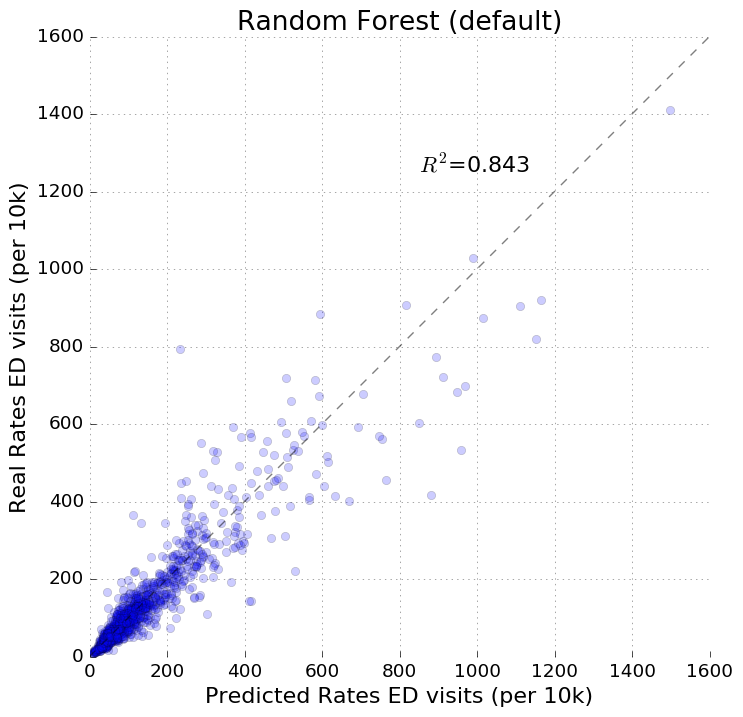

In [23]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.title('Random Forest (default)')

line= r'$R^2$=%.3f' % R2_test
plt.text(850,1250,line)
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('RandomForest_Default.png')

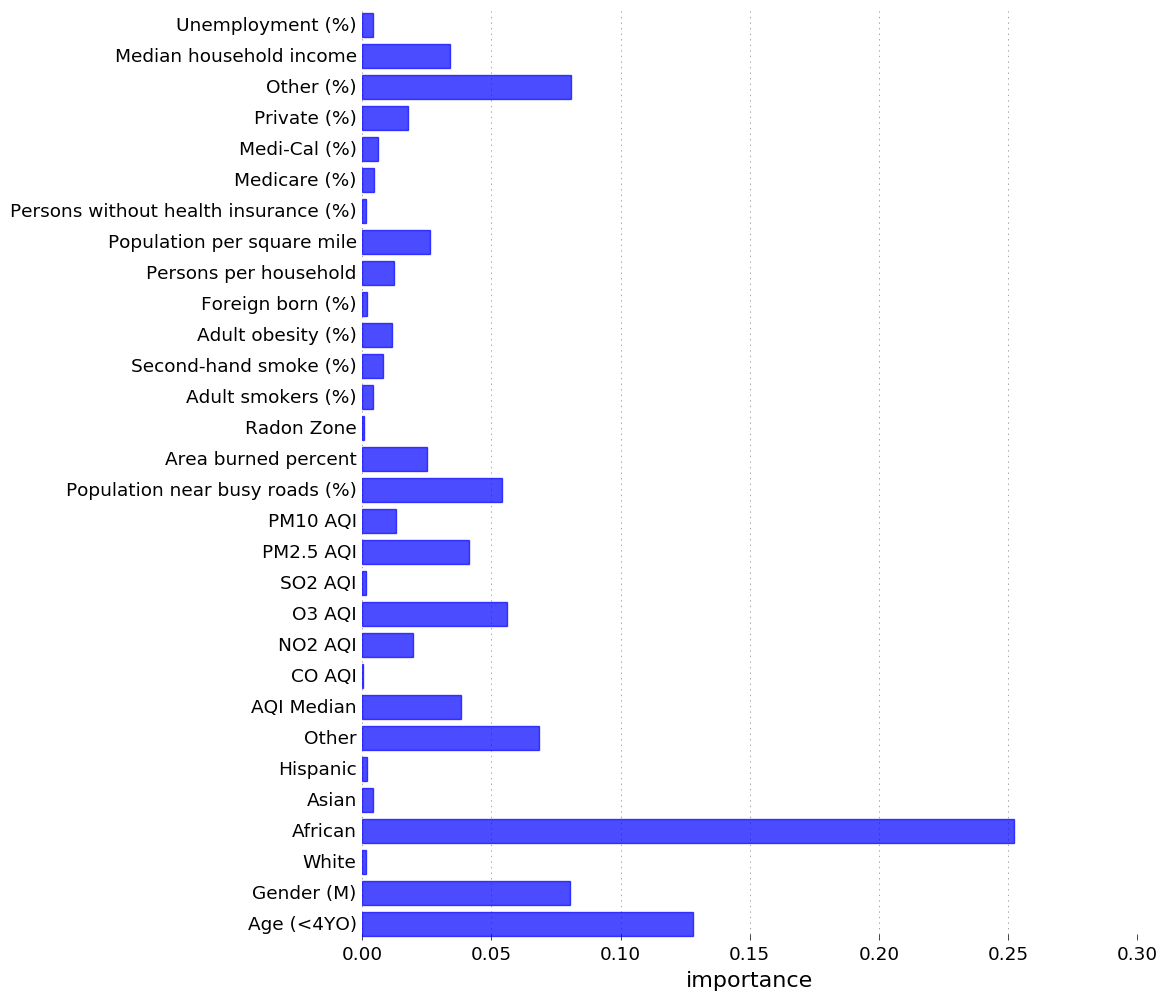

In [26]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(model.feature_importances_)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

plt.barh(indsPLT+shift, model.feature_importances_, height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,scale_feats_df.columns)
plt.xlabel('importance')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')
# xmin,xmax= plt.xlim()
# ax.hlines(indsPLT,xmin,xmax,colors='0.75',linestyles=':')

plt.savefig('RandomForest_Default_feats.png')

Check the model on a cross-validation

In [34]:
model_cv= RandomForestRegressor(random_state=2)

cv= cross_val_score(model_cv,X_train,y_train,cv=10)

cv.mean(),cv.std()

(0.81180968922187091, 0.043146571935945809)

### Tune hyperparameters

In [35]:
Nfeats= len(X_train.columns)
print Nfeats

param_dist = {"n_estimators": range(5,25),
              "max_features": range(Nfeats,Nfeats-10,-1),
              "max_depth": [None, 1, 2],
              'min_samples_split': [2, 3],
              "min_samples_leaf": [1, 2, 3]
              }

30


Randomized Search for best parameters

In [41]:
rnd= RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_dist, cv=10, n_iter=200)

rnd.fit(X_train,y_train)

rnd.best_params_

{'max_depth': None,
 'max_features': 22,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 24}

In [46]:
# model_rnd= rnd.best_estimator_
fin= open('model_RF.pkl','rb')
model_rnd= pickle.load(fin)
fin.close()

In [45]:
R2_train= model_rnd.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model_rnd.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model_rnd.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model_rnd.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.974110
R^2 on test set= 0.866774
RMSE on training= 24.124017
RMSE on test set= 52.863144


In [47]:
# pickle.dump(model_rnd,open('model_RF.pkl','wb'),2)

Grid Search for best parameters

In [43]:
grid= GridSearchCV(RandomForestRegressor(),param_grid=param_dist,cv=10)

grid.fit(X_train,y_train)

grid.best_params_

model_grid= grid.best_estimator_

In [ ]:
R2_train= model_grid.score(X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model_grid.score(X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model_grid.predict(X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model_grid.predict(X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

# Plot Regression Figures

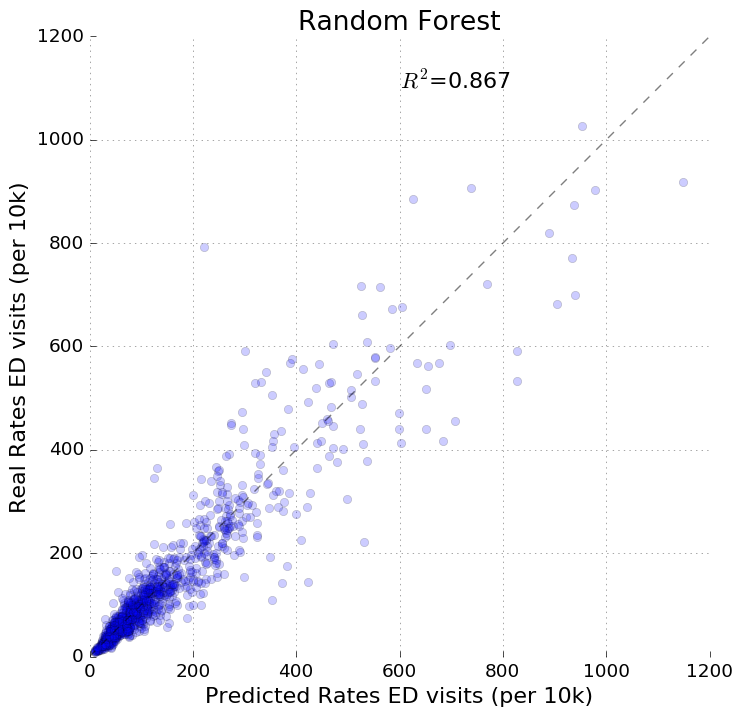

In [48]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.xlim(xmax=1200)
plt.ylim(ymax=1200)
plt.title('Random Forest')

line= r'$R^2$=%.3f' % R2_test
plt.text(600,1100,line)
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('RandomForest_CV.png')

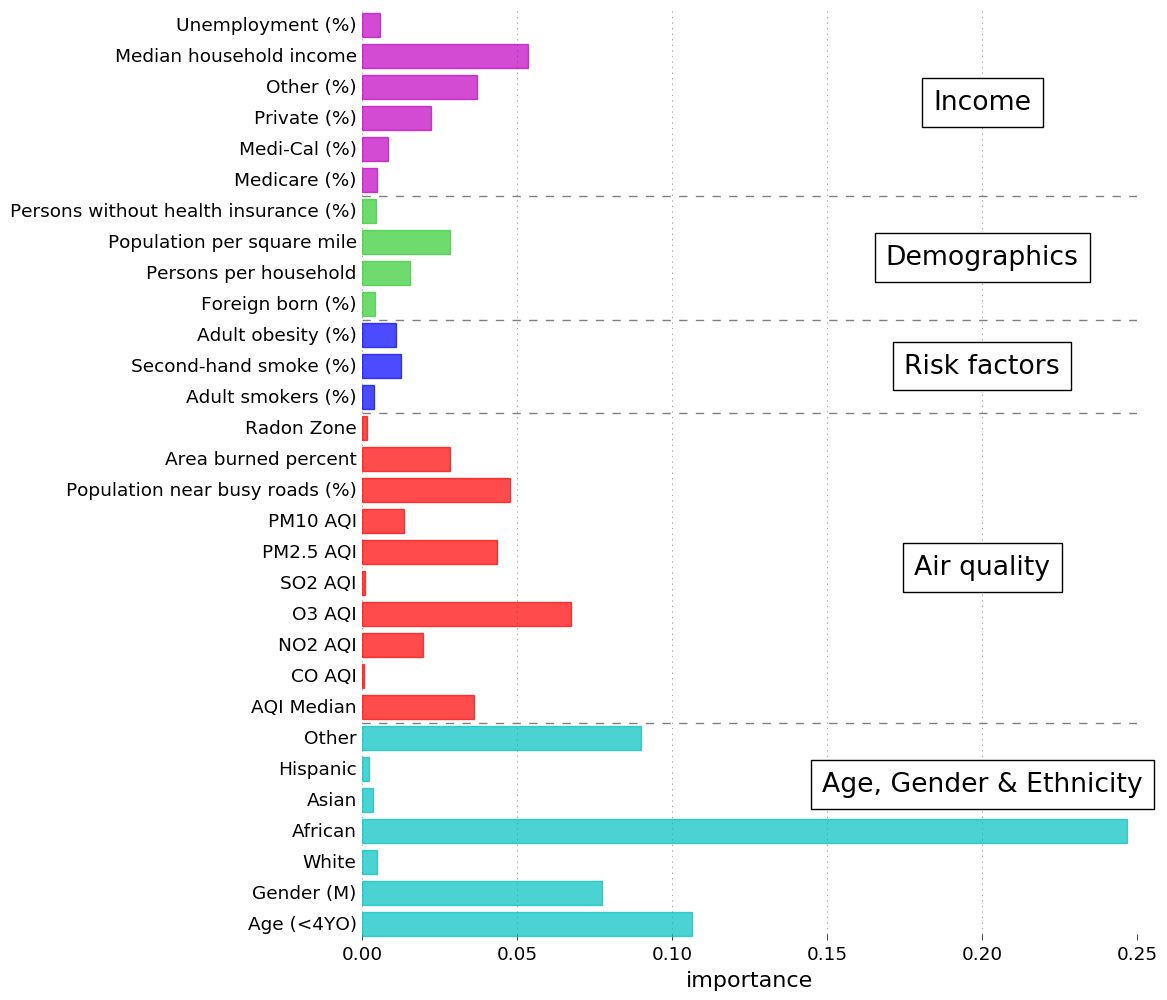

In [89]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

Nlim= len(model_rnd.feature_importances_)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

indLims=[0,7,17,20,24,Nlim]

i1= indsPLT[indLims[0]:indLims[1]]
i2= indsPLT[indLims[1]:indLims[2]]
i3= indsPLT[indLims[2]:indLims[3]]
i4= indsPLT[indLims[3]:indLims[4]]
i5= indsPLT[indLims[4]:indLims[5]]

colors= ['c','r','b','limegreen','m']

plt.barh(indsPLT[i1]+shift, model_rnd.feature_importances_[i1], height=width, color=colors[0],ec=colors[0],alpha=.7)
plt.barh(indsPLT[i2]+shift, model_rnd.feature_importances_[i2], height=width, color=colors[1],ec=colors[1],alpha=.7)
plt.barh(indsPLT[i3]+shift, model_rnd.feature_importances_[i3], height=width, color=colors[2],ec=colors[2],alpha=.7)
plt.barh(indsPLT[i4]+shift, model_rnd.feature_importances_[i4], height=width, color=colors[3],ec=colors[3],alpha=.7)
plt.barh(indsPLT[i5]+shift, model_rnd.feature_importances_[i5], height=width, color=colors[4],ec=colors[4],alpha=.7)
# plt.barh(indsPLT+shift, model_rnd.feature_importances_, height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,scale_feats_df.columns)
plt.xlabel('importance')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

x_text=.2
boxdict= dict(facecolor='white',pad=8)
xmin,xmax= plt.xlim()
ax.hlines(indLims[1:-1],xmin,xmax,colors='0.5',linestyles='--')
plt.text(x_text,5,'Age, Gender & Ethnicity',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.text(x_text,12,'Air quality',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.text(x_text,18.5,'Risk factors',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.text(x_text,22,'Demographics',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.text(x_text,27,'Income',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.xlim(xmin,xmax)

plt.savefig('RandomForest_CV_feats.png')

Importance of features

In [70]:
print scale_feats_df.columns[np.argsort(model_rnd.feature_importances_)[::-1]]

Index([u'African', u'Age (<4YO)', u'Other', u'Gender (M)', u'O3 AQI',
       u'Median household income', u'Population near busy roads (%)',
       u'PM2.5 AQI', u'Other (%)', u'AQI Median', u'Area burned percent',
       u'Population per square mile', u'Private (%)', u'NO2 AQI',
       u'Persons per household', u'PM10 AQI', u'Second-hand smoke (%)',
       u'Adult obesity (%)', u'Medi-Cal (%)', u'Unemployment (%)', u'White',
       u'Medicare (%)', u'Persons without health insurance (%)',
       u'Foreign born (%)', u'Adult smokers (%)', u'Asian', u'Hispanic',
       u'Radon Zone', u'SO2 AQI', u'CO AQI'],
      dtype='object')


### Ignore features related to Age, Gender, Ethnicity, and Income

In [71]:
scale_feats_df.columns[7:24]

Index([u'AQI Median', u'CO AQI', u'NO2 AQI', u'O3 AQI', u'SO2 AQI',
       u'PM2.5 AQI', u'PM10 AQI', u'Population near busy roads (%)',
       u'Area burned percent', u'Radon Zone', u'Adult smokers (%)',
       u'Second-hand smoke (%)', u'Adult obesity (%)', u'Foreign born (%)',
       u'Persons per household', u'Population per square mile',
       u'Persons without health insurance (%)'],
      dtype='object')

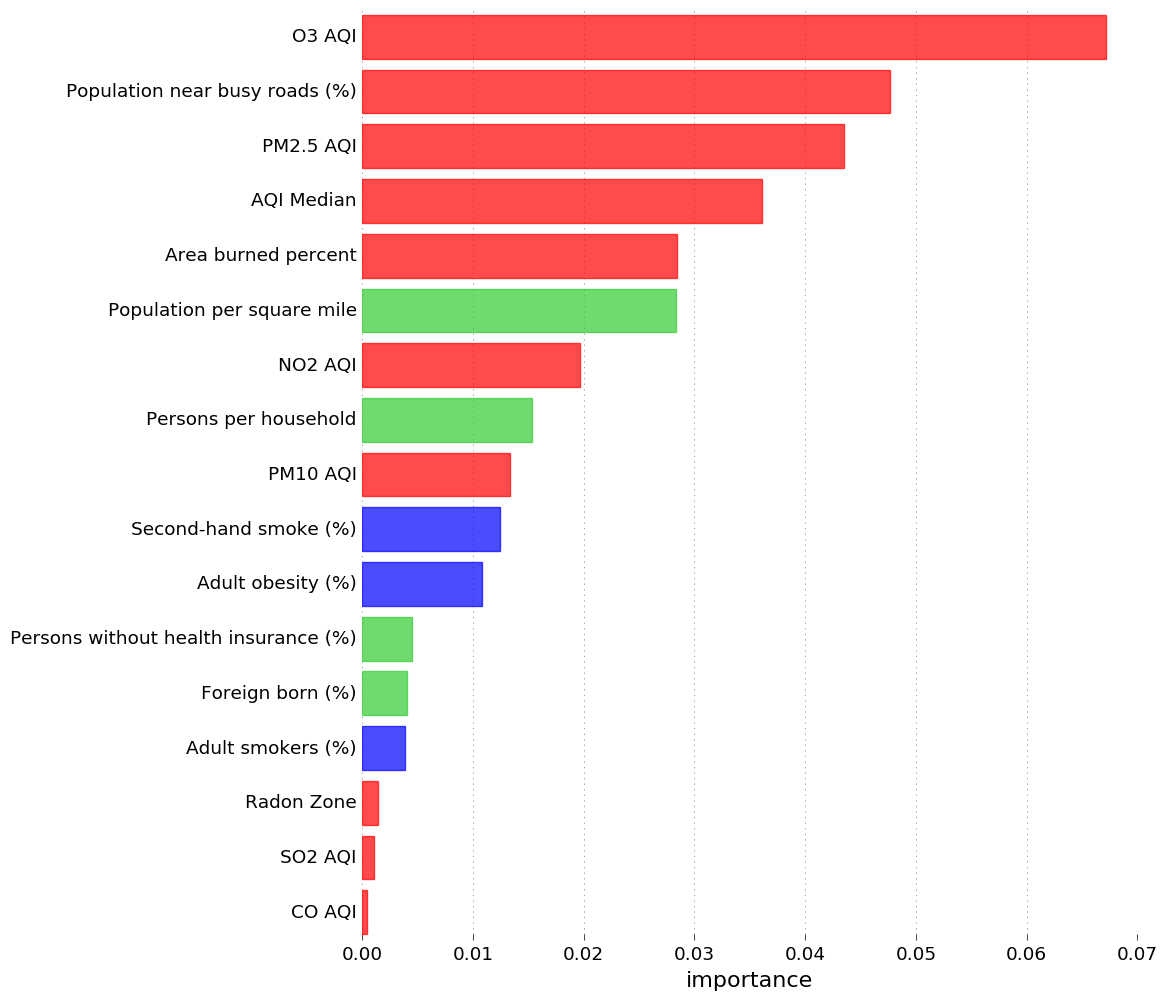

In [112]:
plt.figure(figsize=(10,12))
ax= plt.subplot(111)

feats_impo= model_rnd.feature_importances_[7:24]
feats_name= scale_feats_df.columns[7:24]

colors= np.zeros_like(feats_name)
colors[:10]= 'r'
colors[10:13]= 'b'
colors[13:17]= 'limegreen'

Nlim= len(feats_impo)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

indsSort= np.argsort(feats_impo)
for i in xrange(Nlim):
    plt.barh(indsPLT[i]+shift, feats_impo[indsSort[i]], height=width, color=colors[indsSort[i]],ec=colors[indsSort[i]],alpha=.7)
# plt.barh(indsPLT+shift, feats_impo[indsSort], height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,feats_name[indsSort])
plt.xlabel('importance')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('RandomForest_CV_feats_sorted.png')

# Reduce Features

The model is overfitting so let's check how many features can be removed

In [125]:
ar_R2_train=[]
ar_R2_test=[]
ar_RMSE_train=[]
ar_RMSE_test=[]

model_cv= RandomForestRegressor()
for n in xrange(Nfeats-1,5,-1):
    selector = RFE(model_cv, n_features_to_select=n, step=1)
    selector.fit(X_train,y_train)

    r2_tmp= selector.score(X_train,y_train)
    ar_R2_train.append(r2_tmp)
    rmse_tmp= np.sqrt( mean_squared_error(y_train, selector.predict(X_train)) )
    ar_RMSE_train.append(rmse_tmp)

    rmse_tmp= np.sqrt( mean_squared_error(y_test, selector.predict(X_test)) )
    ar_RMSE_test.append(rmse_tmp)
    r2_tmp= selector.score(X_test,y_test)
    ar_R2_test.append(r2_tmp)

(0, 1)

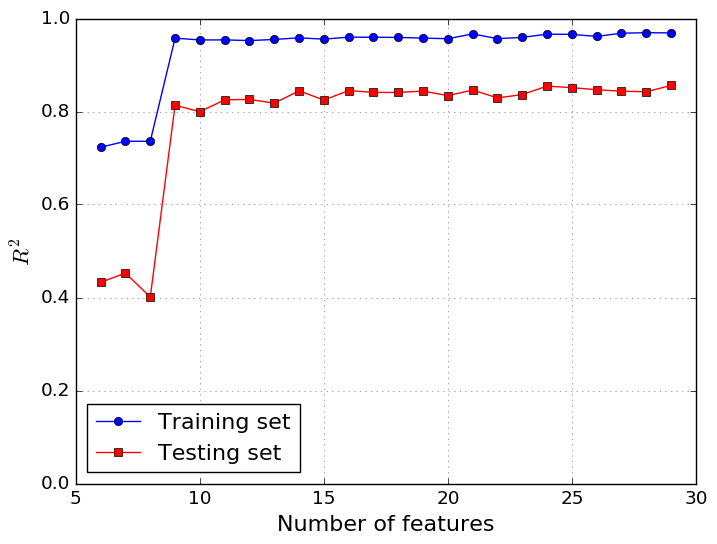

In [141]:
plt.figure()

plt.plot(np.arange(Nfeats-1,5,-1), ar_R2_train, 'bo-', label='Training set')
plt.plot(np.arange(Nfeats-1,5,-1), ar_R2_test, 'rs-', label='Testing set')
plt.xlabel('Number of features')
plt.ylabel(r'$R^2$')
plt.legend(loc='best')

plt.ylim(0,1)

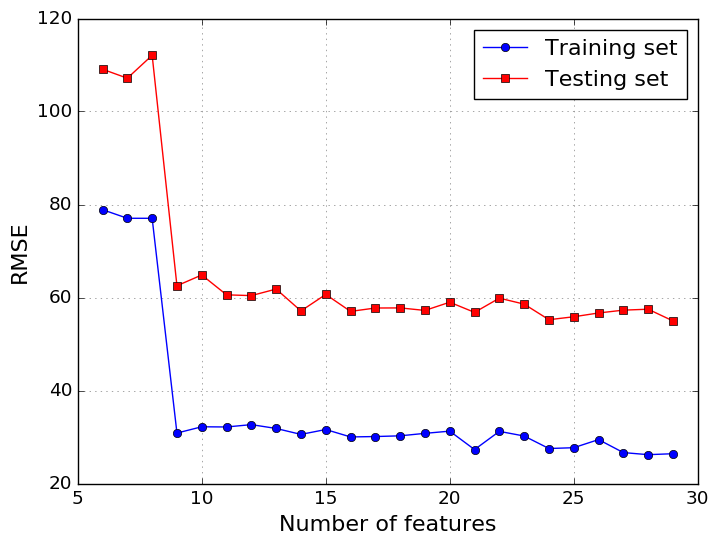

In [142]:
plt.figure()

plt.plot(np.arange(Nfeats-1,5,-1), ar_RMSE_train, 'bo-', label='Training set')
plt.plot(np.arange(Nfeats-1,5,-1), ar_RMSE_test, 'rs-', label='Testing set')
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.legend(loc='best')

### Selecting only 12 features

In [174]:
selector = RFE(model_cv, n_features_to_select=12, step=1)
selector.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
  n_features_to_select=12, step=1, verbose=0)

In [175]:
print scale_feats_df.columns[selector.support_]

Index([u'Age (<4YO)', u'Gender (M)', u'African', u'Other', u'AQI Median',
       u'O3 AQI', u'PM2.5 AQI', u'Population near busy roads (%)',
       u'Area burned percent', u'Private (%)', u'Other (%)',
       u'Median household income'],
      dtype='object')


The next features are

In [176]:
for i in xrange(2,8):
    print scale_feats_df.columns[selector.ranking_==i][0]

NO2 AQI
Population per square mile
PM10 AQI
Persons per household
Second-hand smoke (%)
Medicare (%)


### Reducing the number of features

In [177]:
red_X_train= X_train.loc[:,selector.support_]
red_X_test= X_test.loc[:,selector.support_]

In [178]:
Nfeats= len(red_X_train.columns)
print Nfeats

12


In [180]:
param_dist = {"n_estimators": range(5,20),
              "max_features": range(Nfeats,Nfeats-10,-1),
              "max_depth": [None, 1, 2],
              'min_samples_split': [2, 3],
              "min_samples_leaf": [1, 2, 3]
              }

In [181]:
rnd= RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_dist, cv=10, n_iter=100)

rnd.fit(red_X_train,y_train)

rnd.best_params_

{'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 15}

In [183]:
model_rnd= rnd.best_estimator_
model_rnd.fit(red_X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [329]:
# pickle.dump(model_rnd,open('model_RF.pkl','wb'),2)

In [184]:
R2_train= model_rnd.score(red_X_train,y_train)
print 'R^2 on training= %f' % R2_train
R2_test= model_rnd.score(red_X_test,y_test)
print 'R^2 on test set= %f' % R2_test

y_predict= model_rnd.predict(red_X_train)
RMSE_train= np.sqrt(mean_squared_error(y_train,y_predict))
print 'RMSE on training= %f' % RMSE_train
y_predict= model_rnd.predict(red_X_test)
RMSE_test= np.sqrt(mean_squared_error(y_test,y_predict))
print 'RMSE on test set= %f' % RMSE_test

R^2 on training= 0.949802
R^2 on test set= 0.853123
RMSE on training= 33.591260
RMSE on test set= 55.505240


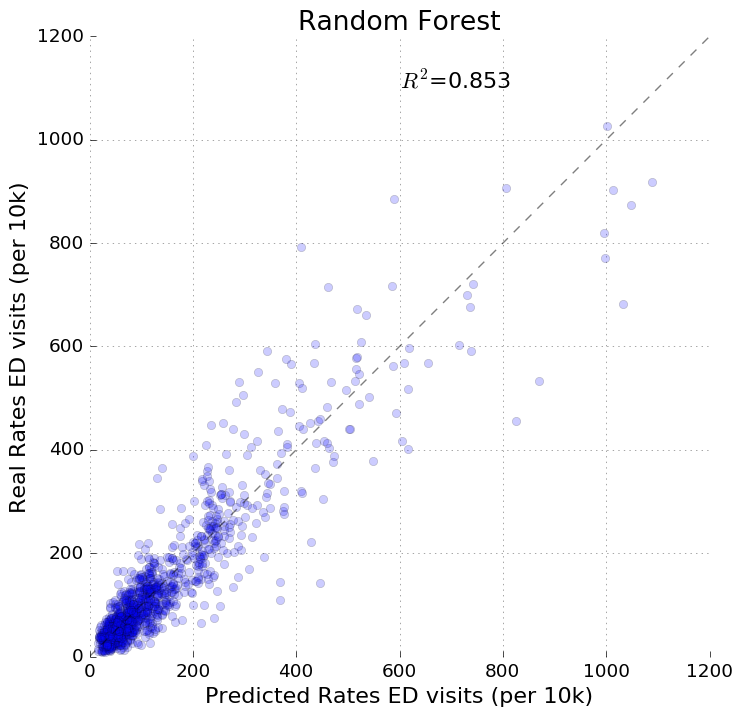

In [185]:
plt.figure(figsize=(8,8))
ax= plt.subplot(111)

plt.plot(y_predict, y_test,'bo',alpha=0.2)

xmin,xmax= plt.xlim()
z= np.linspace(xmin, xmax,10)
plt.plot(z, z,'k--',alpha=0.5)

plt.xlabel('Predicted Rates ED visits (per 10k)')
plt.ylabel('Real Rates ED visits (per 10k)')
plt.xlim(xmax=1200)
plt.ylim(ymax=1200)
plt.title('Random Forest')

line= r'$R^2$=%.3f' % R2_test
plt.text(600,1100,line)
ax.axes.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.savefig('RandomForest_opt.png')

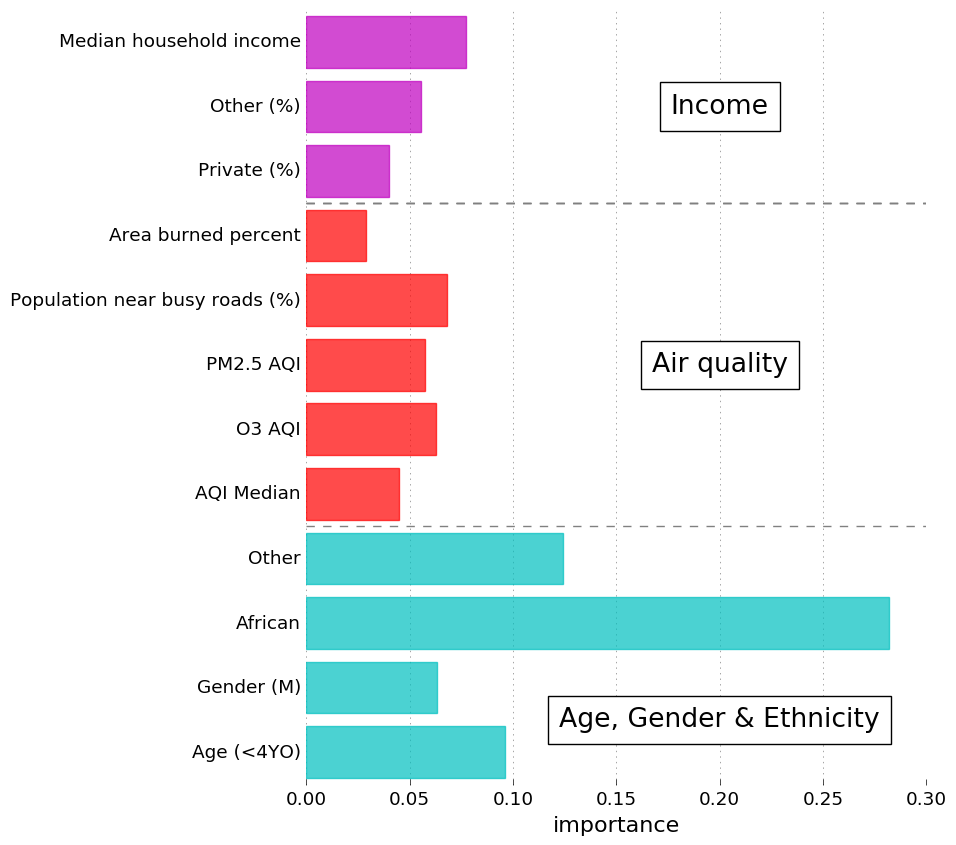

In [204]:
plt.figure(figsize=(8,10))
ax= plt.subplot(111)

Nlim= len(model_rnd.feature_importances_)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

indLims=[0,4,9,9,9,Nlim]

i1= indsPLT[indLims[0]:indLims[1]]
i2= indsPLT[indLims[1]:indLims[2]]
# i3= indsPLT[indLims[2]:indLims[3]]
# i4= indsPLT[indLims[3]:indLims[4]]
i5= indsPLT[indLims[4]:indLims[5]]

colors= ['c','r','b','limegreen','m']

plt.barh(indsPLT[i1]+shift, model_rnd.feature_importances_[i1], height=width, color=colors[0],ec=colors[0],alpha=.7)
plt.barh(indsPLT[i2]+shift, model_rnd.feature_importances_[i2], height=width, color=colors[1],ec=colors[1],alpha=.7)
# plt.barh(indsPLT[i3]+shift, model_rnd.feature_importances_[i3], height=width, color=colors[2],ec=colors[2],alpha=.7)
# plt.barh(indsPLT[i4]+shift, model_rnd.feature_importances_[i4], height=width, color=colors[3],ec=colors[3],alpha=.7)
plt.barh(indsPLT[i5]+shift, model_rnd.feature_importances_[i5], height=width, color=colors[4],ec=colors[4],alpha=.7)
# plt.barh(indsPLT+shift, model_rnd.feature_importances_, height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,scale_feats_df.columns[selector.support_])
plt.xlabel('importance')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

x_text=.2
boxdict= dict(facecolor='white',pad=8)
xmin,xmax= plt.xlim()
ax.hlines(indLims[1:-1],xmin,xmax,colors='0.5',linestyles='--')
plt.text(x_text,1,'Age, Gender & Ethnicity',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.text(x_text,6.5,'Air quality',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
# plt.text(x_text,18.5,'Risk factors',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
# plt.text(x_text,22,'Demographics',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.text(x_text,10.5,'Income',va='center',ha='center',bbox=boxdict,fontdict={'size':'large'})
plt.xlim(xmin,xmax)

plt.savefig('RandomForest_opt_feats.png')

Importance of features

In [200]:
print scale_feats_df.columns[selector.support_][np.argsort(model_rnd.feature_importances_)[::-1]]

Index([u'African', u'Other', u'Age (<4YO)', u'Median household income',
       u'Population near busy roads (%)', u'Gender (M)', u'O3 AQI',
       u'PM2.5 AQI', u'Other (%)', u'AQI Median', u'Private (%)',
       u'Area burned percent'],
      dtype='object')


### Ignore features related to Age, Gender, Ethnicity, and Income

In [201]:
scale_feats_df.columns[selector.support_][4:9]

Index([u'AQI Median', u'O3 AQI', u'PM2.5 AQI',
       u'Population near busy roads (%)', u'Area burned percent'],
      dtype='object')

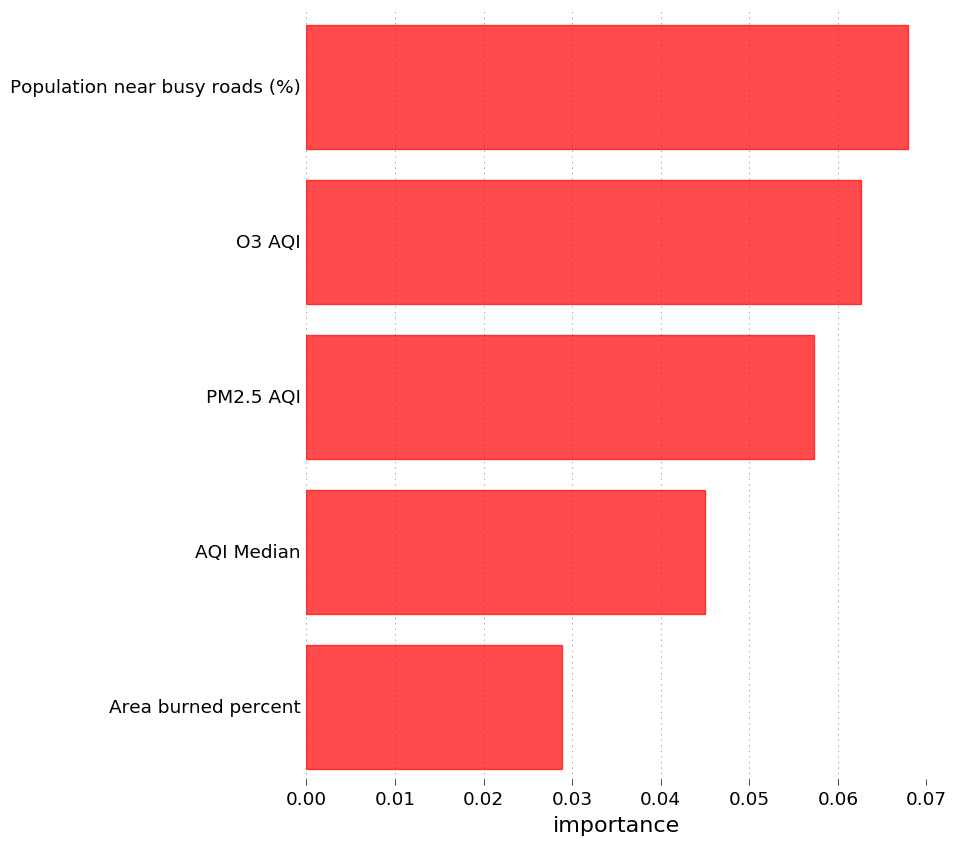

In [203]:
plt.figure(figsize=(8,10))
ax= plt.subplot(111)

feats_impo= model_rnd.feature_importances_[4:9]
feats_name= scale_feats_df.columns[selector.support_][4:9]

colors= np.zeros_like(feats_name)
colors[:]= 'r'
# colors[10:13]= 'b'
# colors[13:17]= 'limegreen'

Nlim= len(feats_impo)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

indsSort= np.argsort(feats_impo)
for i in xrange(Nlim):
    plt.barh(indsPLT[i]+shift, feats_impo[indsSort[i]], height=width, color=colors[indsSort[i]],ec=colors[indsSort[i]],alpha=.7)
# plt.barh(indsPLT+shift, feats_impo[indsSort], height=width, color='b',ec='b',alpha=.7)

# plt.legend(loc='best')
# plt.xlim(xmin=-0.01)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,feats_name[indsSort])
plt.xlabel('importance')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('RandomForest_opt_feats_sorted.png')

# Save the data for the website

Save importance factors

In [246]:
importance= pd.Series(feats_impo,index=np.array(feats_name),name='importance')
importance= pd.DataFrame([importance])
importance.to_csv('web_impo_feats.csv', index=False, header=True)

In [273]:
importance

,AQI Median,O3 AQI,PM2.5 AQI,Population near busy roads (%),Area burned percent
importance,0.045009,0.062597,0.057282,0.067909,0.028893


Save Data Frame

In [279]:
web_feats_df= feats_df[scale_feats_df.columns[selector.support_]]
web_feats_df.to_csv('temp_web_feats.csv',index=False,header=True)

In [280]:
web_feats_df.columns

Index([u'Age (<4YO)', u'Gender (M)', u'African', u'Other', u'AQI Median',
       u'O3 AQI', u'PM2.5 AQI', u'Population near busy roads (%)',
       u'Area burned percent', u'Private (%)', u'Other (%)',
       u'Median household income'],
      dtype='object')

Save index and target information

In [306]:
y_predict= model_rnd.predict(web_feats_df)

In [307]:
data_df.columns[:11]

Index([u'County', u'Year', u'Number', u'Rate (per 10k)', u'Age (<4YO)',
       u'Gender (M)', u'White', u'African', u'Asian', u'Hispanic', u'Other'],
      dtype='object')

In [308]:
web_index_df= data_df.loc[:,[u'County', u'Year', u'Age (<4YO)', u'Gender (M)',
               u'White', u'African', u'Asian', u'Hispanic', u'Other', u'Rate (per 10k)']]

In [309]:
web_index_df['Rate predict']= y_predict

In [316]:
web_index_df.head()

,County,Year,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Rate (per 10k),Rate predict
0,Alameda,2005,1,0,0,1,0,0,0,448.28,235.736067
1,Alameda,2005,1,1,0,1,0,0,0,708.98,612.574289
2,Alameda,2005,0,0,0,1,0,0,0,221.79,209.862844
3,Alameda,2005,0,1,0,1,0,0,0,254.14,240.728556
4,Alameda,2005,1,0,0,0,1,0,0,51.37,72.733467


In [312]:
web_index_df.to_csv('temp_web_index.csv',index=False,header=True)

Data only from 2015

In [317]:
inds= (web_index_df['Year']==2014)

In [321]:
index_2014_df= web_index_df[inds]
feats_2014_df= web_feats_df[inds]

# Get Impact Factors
### How much are ED visits affected by changes in the features?

In [402]:
change_2014_df= feats_2014_df[scale_feats_df.columns[selector.support_][4:9]]

In [403]:
fraction= 0.9

Change AQI Median

In [404]:
copy_df= feats_2014_df.copy()

copy_df['AQI Median']= fraction*copy_df['AQI Median']

vals= model_rnd.predict(copy_df)

# change_2014_df.loc[:,'AQI Median']= (index_2014_df['Rate predict'] - vals)
change_2014_df.loc[:,'AQI Median']= np.abs(index_2014_df['Rate predict'] - vals)

Change ozone

In [405]:
copy_df= feats_2014_df.copy()

copy_df['O3 AQI']= fraction*copy_df['O3 AQI']

vals= model_rnd.predict(copy_df)

# change_2014_df.loc[:,'O3 AQI']= (index_2014_df['Rate predict'] - vals)
change_2014_df.loc[:,'O3 AQI']= np.abs(index_2014_df['Rate predict'] - vals)

Change PM2.5

In [406]:
copy_df= feats_2014_df.copy()

copy_df['PM2.5 AQI']= fraction*copy_df['PM2.5 AQI']

vals= model_rnd.predict(copy_df)

# change_2014_df.loc[:,'PM2.5 AQI']= (index_2014_df['Rate predict'] - vals)
change_2014_df.loc[:,'PM2.5 AQI']= np.abs(index_2014_df['Rate predict'] - vals)

Change traffic pollution

In [407]:
copy_df= feats_2014_df.copy()

copy_df['Population near busy roads (%)']= fraction*copy_df['Population near busy roads (%)']

vals= model_rnd.predict(copy_df)

# change_2014_df.loc[:,'Population near busy roads (%)']= (index_2014_df['Rate predict'] - vals)
change_2014_df.loc[:,'Population near busy roads (%)']= np.abs(index_2014_df['Rate predict'] - vals)

Change area burned

In [408]:
copy_df= feats_2014_df.copy()

copy_df['Area burned percent']= fraction*copy_df['Area burned percent']

vals= model_rnd.predict(copy_df)

# change_2014_df.loc[:,'Area burned percent']= (index_2014_df['Rate predict'] - vals)
change_2014_df.loc[:,'Area burned percent']= np.abs(index_2014_df['Rate predict'] - vals)

Save change datafram into impact score file

In [411]:
change_2014_df.to_csv('temp_impactscore_2014.csv',index=False,header=True)

In [413]:
index_2014_df.to_csv('temp_index_2014.csv',index=False,header=True)

In [414]:
feats_2014_df.to_csv('temp_feats_2014.csv',index=False,header=True)